# Identifying Autism in Children

### Problem definition

Autistic Spectrum Disorder (ASD) is a neurodevelopmental  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. 

Therefore this project seeks to create, a time-efficient and accessible ASD screening model to help health professionals and inform individuals whether they should pursue formal clinical diagnosis. 

### Data 
Area: Medical, health and social science

#### Sourced from: 

Fayez Thabtah
Department of Digital Technology
Manukau Institute of Technology,
Auckland, New Zealand
fadi.fayez@manukau.ac.nz

#### Documentation:

The documentation and data dictionary for this dataset can be found in the project file and can be accessed in google docs.

#### Data Dictionary:


A1
 Does your child look at you when you call his/her name?
 
 
A2
How easy is it for you to get eye contact with your child? 


A3
Does your child point to indicate that s/he wants something? (e.g. a toy that is 
out of reach) 


A4
Does your child point to share interest with you? (e.g. poin9ng at an 
interes9ng sight) 


A5
Does your child pretend? (e.g. care for dolls, talk on a toy phone) 


A6
Does your child follow where you’re looking? 


A7
If you or someone else in the family is visibly upset, does your child show signs 
of wan9ng to comfort them? (e.g. stroking hair, hugging them)


A8
Would you describe your child’s first words as: 


A9
Does your child use simple gestures? (e.g. wave goodbye) 


A10
Does your child stare at nothing with no apparent purpose? 

etc.

A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset.

For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9).

However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question.

If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.


### Evaluation and Modelling

This a classification model and various evalution metrics, such as precision and confusion matrix will be used.


## NB 

When Non Numeric data is Converted to Numeric data for Class/ASD Traits

No = 0
Yes = 1


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

#Import data as csv
autism_data = pd.read_csv('data/toddler-autism.csv')
autism_data.head().T

,0,1,2,3,4
Case_No,1,2,3,4,5
A1,0,1,1,1,1
A2,0,1,0,1,1
A3,0,0,0,1,0
A4,0,0,0,1,1
A5,0,0,0,1,1
A6,0,1,0,1,1
A7,1,1,1,1,1
A8,1,0,1,1,1
A9,0,0,0,1,1


In [2]:
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### Demographics
The Bar Graph bellow shows the demographics of 1054 patients.
The larger portion of the patients is made up of White Europeans making up 300+ of the total,
And the least represented in this dataset are Native Indians.

#### Suggestions 
To make ASD Screening more accesible to minority groups.

Ethnicity    1054
dtype: int64

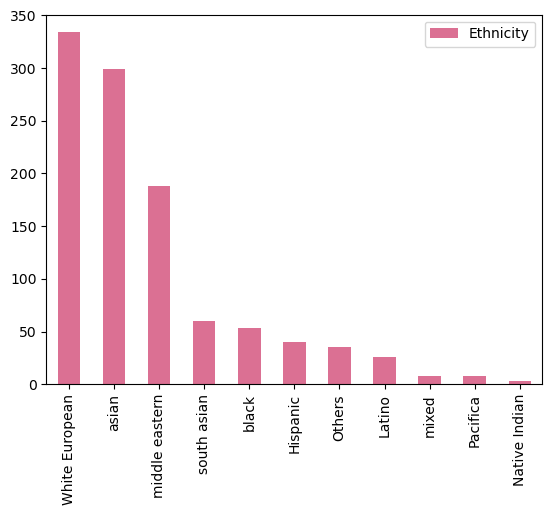

In [3]:
# Value Counts for Ethnicity groups
ethnicity_count=autism_data['Ethnicity'].value_counts().to_frame()
ethnicity_count.plot(kind='bar',color=['palevioletred']);
#fig, ax1, ax2 = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
#ax1.hist(ethnicity_count)
ethnicity_count.sum()


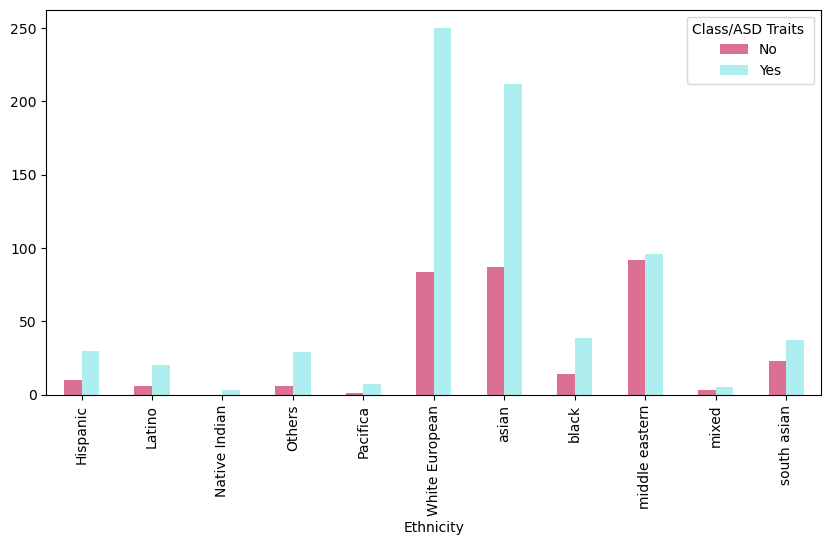

In [4]:
#Visialize Ethnicity groups against ASD Traits Yes or No
pd.crosstab(autism_data['Ethnicity'],autism_data['Class/ASD Traits ']).plot(kind='bar',figsize=(10,5),color=['palevioletred','paleturquoise']);


In [5]:
copy_df = autism_data.copy()

Below is a bar graph that shows the values scored out of 10 on the Qchat by both females and males 

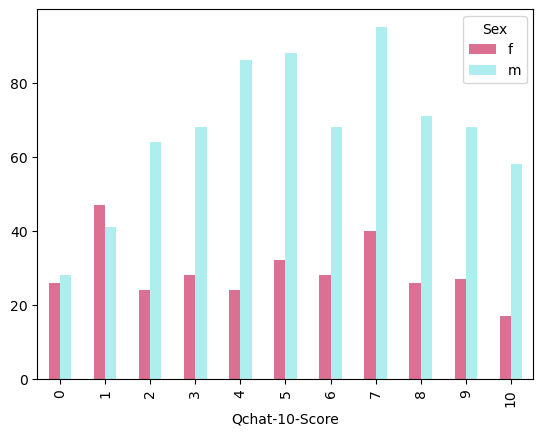

In [6]:
pd.crosstab(copy_df['Qchat-10-Score'],copy_df['Sex']).plot(kind='bar',color=['palevioletred','paleturquoise']);

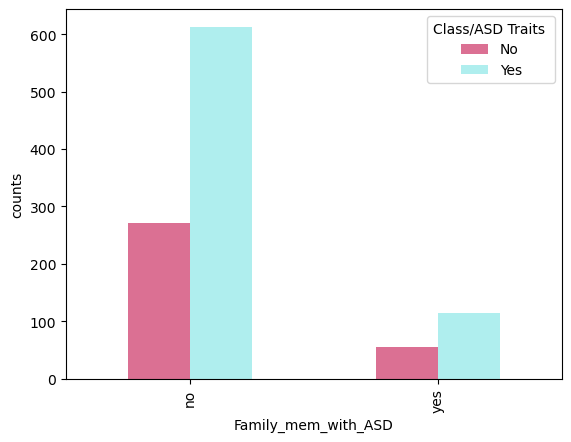

In [7]:
# A cross tab of patients whoes family members with ASD, and Patients with ASD Traits.

pd.crosstab(copy_df['Family_mem_with_ASD'],copy_df['Class/ASD Traits ']).plot(kind='bar',ylabel='counts',color=['palevioletred','paleturquoise']);


In [8]:
copy_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Case_No,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
A1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1
A2,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
A3,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
A4,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0
A5,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1
A6,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0
A7,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1
A8,1,0,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1
A9,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0


In [9]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [10]:
#convert strings to float
for label, content in copy_df.items():
    if pd.api.types.is_object_dtype(content):
         copy_df[label]=copy_df[label].astype('category')
    if not pd.api.types.is_numeric_dtype(content):
            copy_df[label]=pd.Categorical(content).codes

In [11]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Case_No                 1054 non-null   int64
 1   A1                      1054 non-null   int64
 2   A2                      1054 non-null   int64
 3   A3                      1054 non-null   int64
 4   A4                      1054 non-null   int64
 5   A5                      1054 non-null   int64
 6   A6                      1054 non-null   int64
 7   A7                      1054 non-null   int64
 8   A8                      1054 non-null   int64
 9   A9                      1054 non-null   int64
 10  A10                     1054 non-null   int64
 11  Age_Mons                1054 non-null   int64
 12  Qchat-10-Score          1054 non-null   int64
 13  Sex                     1054 non-null   int8 
 14  Ethnicity               1054 non-null   int8 
 15  Jaundice             

In [12]:
copy_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,4,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,4,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,4,1


In [13]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Case_No                 1054 non-null   int64
 1   A1                      1054 non-null   int64
 2   A2                      1054 non-null   int64
 3   A3                      1054 non-null   int64
 4   A4                      1054 non-null   int64
 5   A5                      1054 non-null   int64
 6   A6                      1054 non-null   int64
 7   A7                      1054 non-null   int64
 8   A8                      1054 non-null   int64
 9   A9                      1054 non-null   int64
 10  A10                     1054 non-null   int64
 11  Age_Mons                1054 non-null   int64
 12  Qchat-10-Score          1054 non-null   int64
 13  Sex                     1054 non-null   int8 
 14  Ethnicity               1054 non-null   int8 
 15  Jaundice             

## Import Classification Models.

In [14]:
#clf = svm.SVC()
from sklearn import svm 

#clf = RandomForestClassifier(n_estimators=10)
from sklearn.ensemble import RandomForestClassifier

#clf = LogisticRegression(random_state=0).fit(X, y)
from sklearn.linear_model import LogisticRegression

#dtc = DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier

#knn = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB


Split data into train and test sets.

In [15]:
from sklearn.model_selection import train_test_split
X = copy_df.drop('Class/ASD Traits ', axis=1)
y = copy_df['Class/ASD Traits ']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

print('X_Train:',X_train.shape, 'X_Test:',X_test.shape, 'y_train:',y_train.shape,'y_test:',y_test.shape)


X_Train: (843, 18) X_Test: (211, 18) y_train: (843,) y_test: (211,)


In [16]:
'''
Create a function which will take each Machine lerning model and train and fit the data.
1. Store each model in a data dictionary 
2. loop through each model and train and fit X train and Y train.
3. Store the results in a data dictionary.
'''

clf_models = {
    
    'svc.SVM': svm.SVC(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),

    
    
}

# loop through clf_models
score_preds = {}

for model_name, model in clf_models.items(): 
    
    np.random.seed(42)
    clf = model
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    score_preds[model_name]=score
    
    
score_preds
    

/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'svc.SVM': 0.6729857819905213,
 'RandomForestClassifier': 1.0,
 'LogisticRegression': 1.0,
 'DecisionTreeClassifier': 1.0}

### Model Comparison


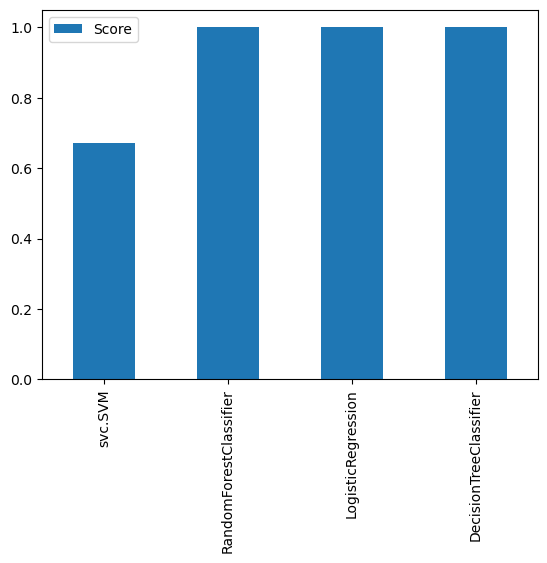

In [17]:
score_df = pd.DataFrame(score_preds,index=(['Score']))
score_df.T.plot.bar();

### Evaluation Matrics 

In [18]:
# Using RandomForestClassifier
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit (X_train,y_train)
y_preds=clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int8)

### Validating the Random Forest Classifier.

In [19]:
#Cross Validation 
from sklearn.model_selection import cross_val_score

cross_val_score(clf,X_test,y_test,cv=10)

'''Because Our dataset has less than 2000 rows of data, our model is overfitting'''

'Because Our dataset has less than 2000 rows of data, our model is overfitting'

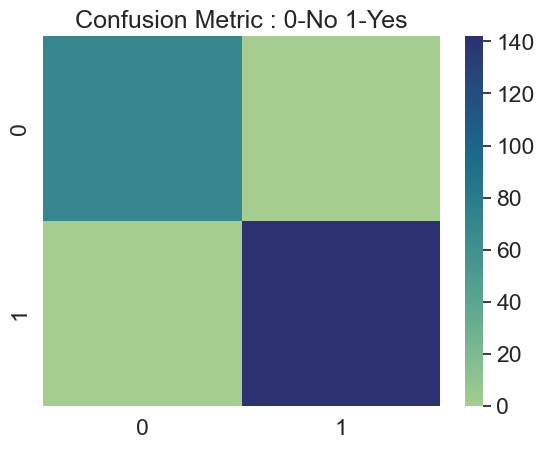

In [20]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix

con_matr = confusion_matrix(y_test,y_preds)

import seaborn as sns

sns.set(font_scale=1.5)
ax=sns.heatmap(con_matr,cmap="crest");
ax.set_title('Confusion Metric : 0-No 1-Yes');

In [21]:
# Dump and Save the model

from joblib import dump, load
dump(clf,filename='prediction-class-asd.joblib')

['prediction-class-asd.joblib']